<a href="https://colab.research.google.com/github/Devansh-Narwariya/Projects-at-DRDO/blob/main/Self_Organizing_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

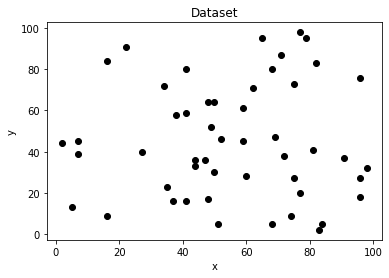

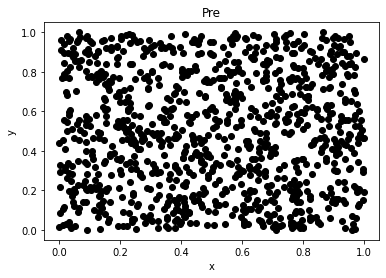

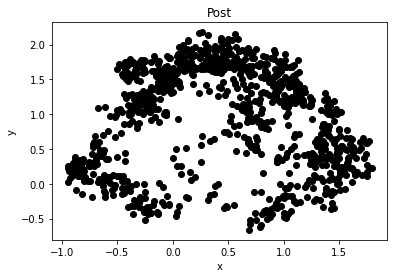

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import operator
from math import pi

class Node:
    """
    Node in the self-organizing map.
    Vector with equal number of dimensions as input data.
    Pos of [x, y] on the map.
    """
    def __init__(self, vector):
        vector = np.array(vector)
        self.vector = vector

class SOM:
    """
    Self-organizing map.
    n_dim      = dimensionality of input data.
    map_dim    = [height, width] of map
    learn_rate = learning rate for nodes
    map        = array of array of nodes (not a passed param)
    n_vis      = number of figures for visualization (not a passed param)
    """
    def __init__(self, n_dim, n_nodes=100, map_dim=[5,5], learn_rate=0.05):
        self.n_dim = n_dim
        self.n_nodes = n_nodes
        self.map_dim = map_dim
        self.learn_rate = learn_rate
        self.map = []
        self.plt_figure = 0
        self.vis_dim = 2
        self.decay_rate = 0.5

    def build_map(self):
        """
        Initializies map of map_dim size with nodes.
        """

        r = np.random.uniform

        for _ in range(self.n_nodes):
            self.map.append(Node([r(0, 1) for x in range(self.n_dim)]))

    def visualize_map(self, dataset=None, title=None, show=False):
        """
        Displays 2D scatterplot of self organizing map nodes or dataset samples.
        Title is a string for the title of the scatterplot.
        Show is bool that determines when plt.show() will be called.
        """

        x = []
        y = []

        if dataset is not None:
            for i in dataset:
                x.append(i[0])
                y.append(i[1])
        else:
            for node in self.map:
                x.append(node.vector[0])
                y.append(node.vector[1])

        global plt

        plt.figure(self.plt_figure)
        plt.scatter(x, y, label='Self Organizing Map', color='k')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(title)

        if show:
            plt.show()

        self.plt_figure += 1


    def _manhatten_distance(self, vector_x, vector_y):
        """
        Returns manhatten distance for vector_x and vector_y
        """
        return sum(abs(vector_x - vector_y))

    def fit(self, input_vector):
        """
        Returns best matching unit (BMU) - closest node vector weight to input_vector.
        """
        input_vector = self._normalize(input_vector)
        distances = {}
        for node in self.map:
            node_dist = self._manhatten_distance(input_vector, node.vector)
            distances[node] = node_dist
        bmu = min(distances.items(), key=operator.itemgetter(1))[0]

        self._update_bmu(bmu, input_vector)
        self._update_neighbors(bmu, input_vector)

        return bmu

    def _update_bmu(self, bmu, vector):
        """
        Updates the weight vector of best matching unit and neighbors.
        """
        bmu.vector += self.learn_rate * (bmu.vector - vector)


    def _update_neighbors(self, bmu, vector):
        """
        Updates the weight vectors for the neighbors of the best matching unit.
        """

        r = 1 * self.decay_rate
        area = Circle((bmu.vector[0], bmu.vector[1]), radius=r)

        neighbors = [node for node in self.map if area.contains_point([node.vector[0], node.vector[1]]) and node is not bmu]

        for node in neighbors:
            node.vector += self.decay_rate * (node.vector - vector)

        if self.decay_rate > 0.03:
            self.decay_rate -= .01

    def _normalize(self, vector):
        """
        Normalizes input vector to a range between 0 and 1
        """
        norm = (vector-min(vector))/(max(vector)-min(vector))
        return norm


def main():
    seed = 2
    np.random.seed(seed)

    X = [[np.random.randint(1, 100) for _ in range(10)] for i in range(50)]

    X = np.array(X)
    input_dim = X[0].shape[0]

    som = SOM(input_dim, n_nodes=1000, learn_rate=.05)

    som.build_map()

    som.visualize_map(dataset=X, title='Dataset')
    som.visualize_map(title='Pre', show=True)

    epochs = 1
    for e in range(epochs):
        for i in X:
            som.fit(i)

    som.visualize_map(title='Post', show=True)

if __name__ == '__main__':
    main()